# Predicting length of stay at the Sonoma Animal Shelter

#### Glenn Bruns

How long is a dog likely to stay at the Sonoma Animal Shelter?  It could be useful for the shelter to know this at the time the dog arrives at the shelter.  Is age an important factor?  What about size? Is linear regression effective in predicting a dog's length of stay?

v2.3

### Instructions:
* Please read the entire notebook carefully.
* Problems for you to insert code are indicated with lines that begin with #@ followed by a problem number.
* Your code should produce the same output as in the model output file.
* Do not modify any code except in the problem cells.
* A large penalty will be applied if you don't restart kernel and run all cells before submitting!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
# this is in preparation for Pandas 3.0
pd.options.mode.copy_on_write = True

In [6]:
# plotting
sns.set_theme(style='whitegrid', context='notebook')

### Read the data

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-12-2022.csv")

We immediately drop all rows for which the animal type is not "DOG".  Once we have done that, we no longer need the 'Type' variable.

In [10]:
df = df[df['Type'] == 'DOG']
df.drop('Type', axis=1, inplace=True)

Also, the 'Intake Date' and 'Date of Birth' variables are converted to Pandas timestamp type.

In [12]:
df['Intake Date'] = pd.to_datetime(df['Intake Date'])
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])

df.set_index('Intake Date', inplace=True)
df.sort_index(inplace=True)

### Preliminary exploration

Look at the size of the data set, the variables included, and the amount of missing data.

In [15]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12454 entries, 2013-08-22 to 2021-11-29
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Name                  11237 non-null  object        
 1   Breed                 12454 non-null  object        
 2   Color                 12454 non-null  object        
 3   Sex                   12454 non-null  object        
 4   Size                  12423 non-null  object        
 5   Date Of Birth         10377 non-null  datetime64[ns]
 6   Impound Number        12454 non-null  object        
 7   Kennel Number         12451 non-null  object        
 8   Animal ID             12454 non-null  object        
 9   Outcome Date          12379 non-null  object        
 10  Days in Shelter       12454 non-null  int64         
 11  Intake Type           12454 non-null  object        
 12  Intake Subtype        12454 non-null  object        
 13 

,Name,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Outcome Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
Intake Date,,,,,,,,,,,,,,,,,,,,,
2013-08-22,*ALICE,PIT BULL,GRAY/WHITE,Spayed,MED,2012-09-03,K13-005161,DA38,A296009,04/14/2014,...,VET_HOSP,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
2013-08-31,KHLOE,PIT BULL,BLUE/WHITE,Spayed,MED,2012-10-09,K13-005378,DA11,A294143,04/14/2014,...,FIELD,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1
2013-09-19,LOKI,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,K13-005670,DI100,A281788,07/30/2014,...,FIELD,EUTHANIZE,BEH SEVERE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,94931.0,"94931(38.325442, -122.71081)",1
2013-10-01,HANK,CHIHUAHUA SH,TAN,Neutered,TOY,2007-10-01,K13-005875,DS96,A297574,01/01/2014,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,*WINDSOR,NaN,NaN,NaN,1
2013-10-08,*BINGO,PIT BULL,TAN/WHITE,Neutered,MED,2012-10-29,K13-006036,DA39,A298002,05/22/2014,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,*HEALDSBURG,95448.0,"95448(38.618857, -122.861927)",1


There is not a lot of missing data, but the date of birth is missing in more than 15% of the rows.  This makes sense, since some animals are probably strays with no identifying information.

It appears that many of the variables are categorical.  To help confirm the variable types, we can look at the number of unique values in each column.

In [18]:
#@ 1  Write an expression that will give the number of unique values in each column of dataframe df.

# YOUR CODE HERE
df.nunique()

Name                     4259
Breed                     803
Color                     197
Sex                         5
Size                        6
Date Of Birth            4301
Impound Number          12454
Kennel Number             146
Animal ID               10613
Outcome Date             2250
Days in Shelter           240
Intake Type                 7
Intake Subtype             28
Outcome Type                9
Outcome Subtype           192
Intake Condition            5
Outcome Condition           6
Intake Jurisdiction        13
Outcome Jurisdiction       12
Outcome Zip Code          568
Location                  568
Count                       2
dtype: int64

What is the distribution of the number of days a dog stays in the shelter?

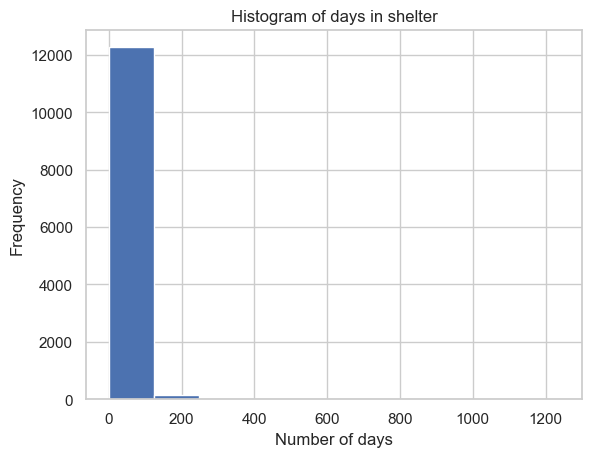

In [20]:
df['Days in Shelter'].plot.hist().set_title('Histogram of days in shelter')
plt.xlabel('Number of days');

It appears that many stay for a small number of days, and very few stay for months or even years.  Plotting with log on the y axis can help in visualizing this distribution.

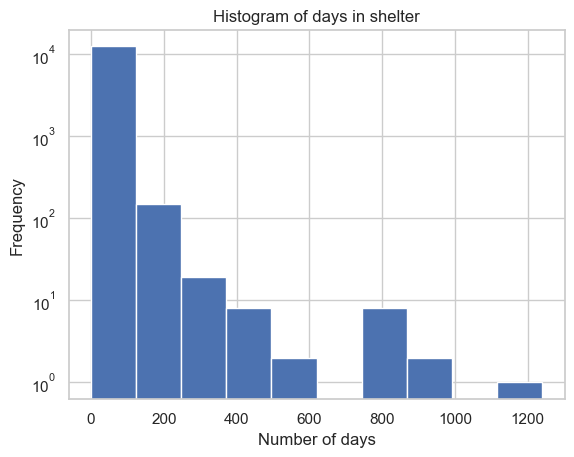

In [22]:
df['Days in Shelter'].plot.hist(logy=True).set_title('Histogram of days in shelter')
plt.xlabel('Number of days');

What is the distribution of intake type and outcome type?

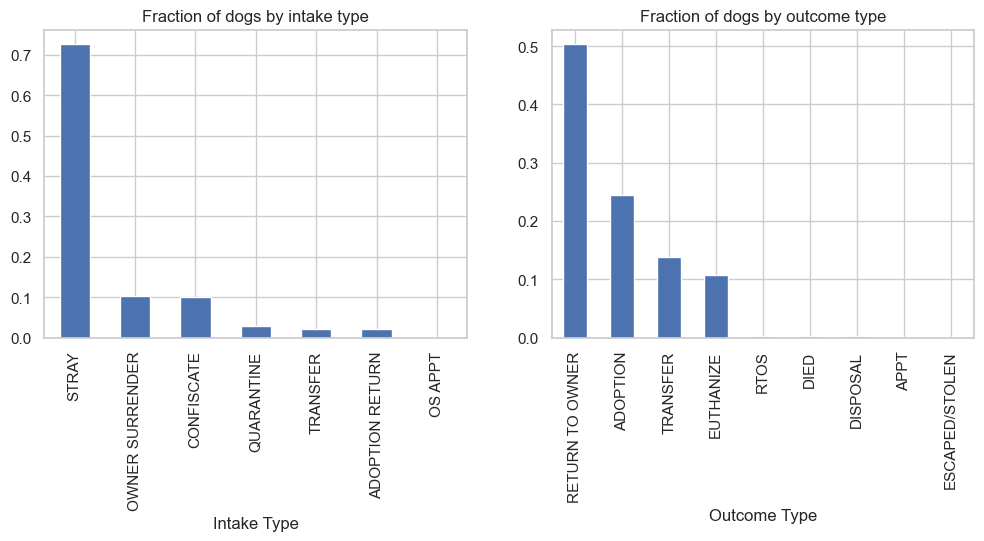

In [24]:
fig,ax = plt.subplots(1, 2, figsize=(12, 4))
df['Intake Type'].value_counts(normalize=True).plot.bar(ax=ax[0]).set_title('Fraction of dogs by intake type')
df['Outcome Type'].value_counts(normalize=True).plot.bar(ax=ax[1]).set_title('Fraction of dogs by outcome type');

By far, most dogs enter the shelter as strays.  Interestingly, about half the dogs leave by being returned to owner.  Less than a quarter of the dogs that enter are adopted.  Sadly, about 1 in 10 dogs that enter the shelter are euthanized.

Many dogs breeds are represented in the data set.  Which dog breeds enter the shelter the most?

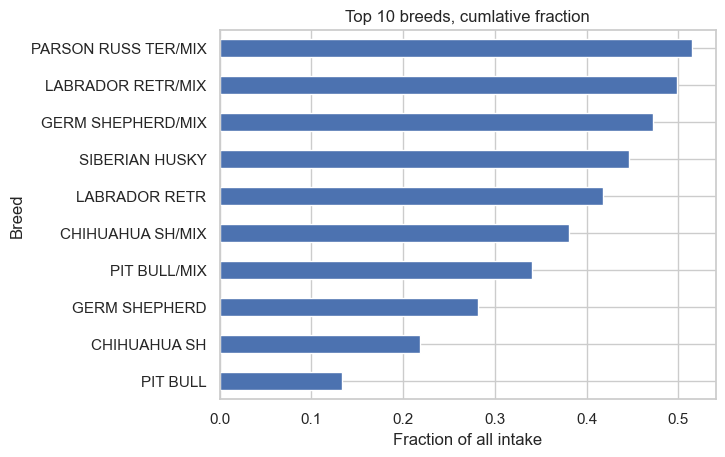

In [27]:
#@ 2  Plot the cumulative fraction of dogs by breed
# Plot only the top 10 breeds.
# Use a horizontal barplot.
#
# hint: use the 'normalize' option of value_counts()
# hint: use the method cumsum() of Pandas

# YOUR CODE HERE

df['Breed'].value_counts(normalize=True).head(10).cumsum().plot.barh()
plt.title('Top 10 breeds, cumlative fraction')
plt.xlabel('Fraction of all intake')
plt.show()

Associated with each intake type are one or more subtypes.
What are common combinations of intake types and subtypes? 

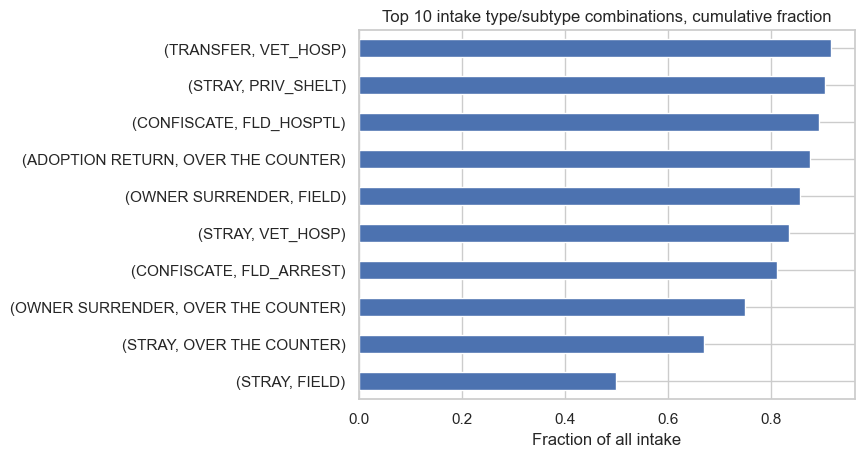

In [29]:
#@ 3  Plot the cumulative fraction of dog intake type/intake subtype combination
# Plot only the top 10 combinations.
# Do not show any y label.
# Use a horizontal barplot.
# 
# hint: value_counts() can be used with multiple columns of a dataframe.

# YOUR CODE HERE
cross = pd.crosstab(df['Intake Type'], df['Intake Subtype'], normalize=True)
series = cross.stack()
top10 = series.sort_values(ascending=False).head(10)
top10.cumsum().plot.barh()
plt.title('Top 10 intake type/subtype combinations, cumulative fraction')
plt.ylabel('')
plt.xlabel('Fraction of all intake')
plt.show()

The top few intake type/subtype combinations account for most of the data.  The first four combinations account for more than 80% of the dogs that enter the shelter.   About half of all dogs that enter the shelter are strays that are taken in from the "field".  Amost 70% are strays taken in from the field or over the counter.

We are interesting in predicting how long a dog will stay in the shelter.  Does the intake type appear to be relevant?

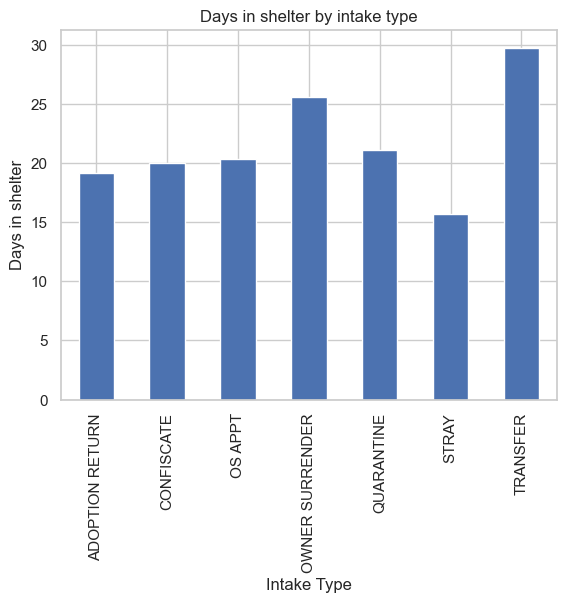

In [32]:
#@ 4  Plot the average number of days for each intake type.
# Hint: when you see problems like this, you should think "group by"
# Hint: Pandas plotting is convenient here

# YOUR CODE HERE
avgs = df.groupby('Intake Type')['Days in Shelter'].mean().plot.bar()
plt.title('Days in shelter by intake type')
plt.ylabel('Days in shelter')
plt.show()

On average, strays appear to spend less time in the shelter, and dogs that have been transferred to the shelter appear to spend more time in the shelter.

### Data preprocessing

Drop all variables related to outcome, because we want to predict length of stay from variables that are known at the time the animal arrives at the shelter.

The 'Location' variable is related to the outcome, according to the data dictionary.

In [36]:
df.drop(['Outcome Date', 'Outcome Type', 'Outcome Subtype', 'Outcome Condition', 'Outcome Jurisdiction', 'Outcome Zip Code', 'Location'],
        axis=1, inplace=True)

Drop additional variables we know that we will not want to use.

In [38]:
df.drop(['Name', 'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Jurisdiction', 'Count'], axis=1, inplace=True)

There are many color values, and their relationships are complicated, so drop the color variable.

In [40]:
df.drop(['Color'], axis=1, inplace=True)

Are there any NA values remaining in the data?

In [42]:
df.isna().mean().sort_values()

Breed               0.000000
Sex                 0.000000
Days in Shelter     0.000000
Intake Type         0.000000
Intake Subtype      0.000000
Intake Condition    0.000000
Size                0.002489
Date Of Birth       0.166774
dtype: float64

There are only a small number of rows in which the Size variable is NA, so drop them.

In [44]:
# dropna() could also be used, but this is simpler
df = df[~df['Size'].isna()]

We want to use the dogs's age as a predictor variable.  The age can be computed from 'Intake Date' and 'Date of Birth', but there are many missing values in the 'Date of Birth' variable.

Our approach will be to add a new column showing whether the date of birth was missing, and then to impute the missing age values.  The date of birth variable is then removed.

The new Age variable is in units of years.

In [46]:
df['Unknown DOB'] = df['Date Of Birth'].isna()
df['Age'] = (df.index - df['Date Of Birth'])/np.timedelta64(365, 'D')
df.drop('Date Of Birth', axis=1, inplace=True)

Impute the missing age values using the median.

In [48]:
#@ 5  Write a statement to replace all NA values of column 'Age' with the median age value.
# df must be modified.
#
# Hints:
# - Pandas has a median() method on series objects.
# - remember fillna()
# - using inplace=True may cause warning, so avoid that

age  = df['Age'].median()
df['Age'] = df['Age'].fillna(age)



Confirm that variable Age contains no NA values.

In [50]:
df['Age'].isna().sum()

0

Visualize the distribution of age values.

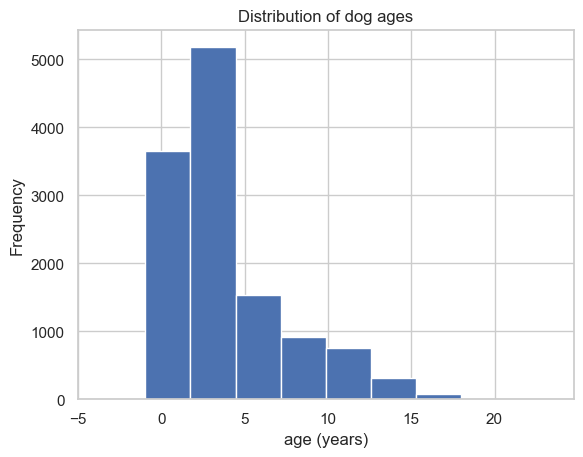

In [52]:
df['Age'].plot.hist(title='Distribution of dog ages')
plt.xlabel('age (years)');

The age histogram shows that some ages are negative.  Are there a significant number of negative values?

In [54]:
#@ 6  Print the number of negative age values.

# YOUR CODE HERE
negAge = df[df['Age'] < 0].shape[0]
print(f"Number of negative age values: {negAge}")

Number of negative age values: 10


Very few rows have negative age, so they can be dropped.

In [56]:
# note that df[df['Age'] >= 0] drop rows with NA Age values
df = df[~(df['Age'] < 0)]

The income type "OS APPT" hardly ever appears, so it is dropped.

In [58]:
#@ 7  Write a statement to remove all rows of df in which the intake type is "OS APPT".
# df should be modified.
# Hint: do this with a boolean mask and a simple assignment statement.

# YOUR CODE HERE
df = df[~(df['Intake Type'] == 'OS APPT')]


In [59]:
# verify that OS APPT has been dropped
df['Intake Type'].value_counts()

Intake Type
STRAY              9013
OWNER SURRENDER    1270
CONFISCATE         1248
QUARANTINE          341
TRANSFER            258
ADOPTION RETURN     255
Name: count, dtype: int64

Verify the total number of NAs in the dataframe.

In [61]:
print(f'Total number of NA values in df: {df.isna().sum().sum()}')

Total number of NA values in df: 0


Add a new variable showing length of stay in log 10.  This will become our predictor variable.

In [63]:
df['Log Days in Shelter'] = np.log10(df['Days in Shelter'] + 1)

### Data exploration

Here is an overview of the data after preprocessing.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12385 entries, 2013-08-22 to 2021-11-29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Breed                12385 non-null  object 
 1   Sex                  12385 non-null  object 
 2   Size                 12385 non-null  object 
 3   Days in Shelter      12385 non-null  int64  
 4   Intake Type          12385 non-null  object 
 5   Intake Subtype       12385 non-null  object 
 6   Intake Condition     12385 non-null  object 
 7   Unknown DOB          12385 non-null  bool   
 8   Age                  12385 non-null  float64
 9   Log Days in Shelter  12385 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 979.7+ KB


Visualize the relationship between a dog's age and the new predictor variable.

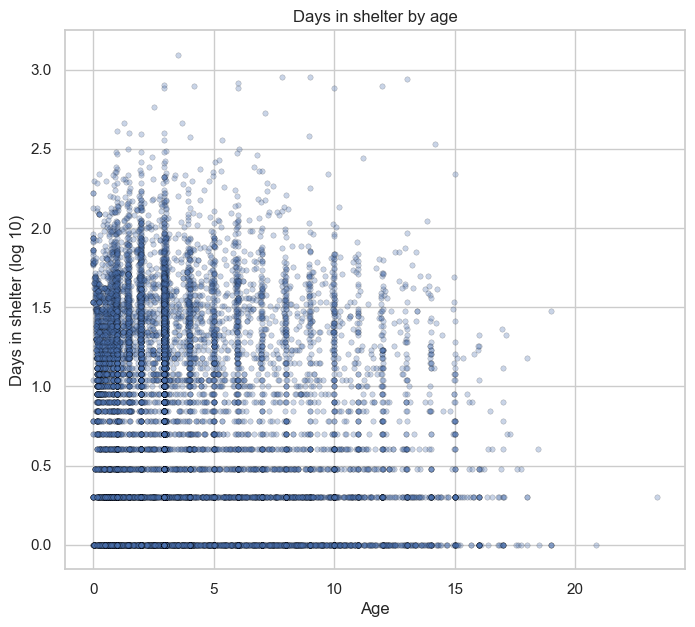

In [68]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Age', y='Log Days in Shelter', data=df, alpha=0.3, s=15, edgecolor='black').set_title('Days in shelter by age');
plt.ylabel('Days in shelter (log 10)');

It is not easy to tell, but it appears that older dogs tend to spend less time in the shelter.  Perhaps older dogs are more often in poor health and are eventually euthanized.  It appears that many dogs are less than 2 years old and stay for about 1-4 weeks.

### Machine learning

First we need to do additional data preprocessing to support machine learning.  We need to encode the categorical variables according to their type.  An issue is that there are many intake subtypes and many breeds.

In [72]:
df.nunique()

Breed                   795
Sex                       5
Size                      6
Days in Shelter         239
Intake Type               6
Intake Subtype           27
Intake Condition          5
Unknown DOB               2
Age                    3075
Log Days in Shelter     239
dtype: int64

Many of the intake subtype values rarely appear, so we will keep the top five values only, and replace all other values with 'OTHER'.  Similarly, we will keep only the top 10 values of breed.

In [74]:
top_subtypes = df['Intake Subtype'].value_counts().index[:5]
df.loc[~df['Intake Subtype'].isin(top_subtypes), 'Intake Subtype'] = 'OTHER'

There are many breeds, so we will keep the top ten values only, and replace all other values with 'OTHER'.

In [76]:
top_breeds = df['Breed'].value_counts().index[:10]
df.loc[~df['Breed'].isin(top_breeds), 'Breed'] = 'OTHER'

In [77]:
#@ 8  Write a statement to replace each of the categorical variables in df with dummy variables
# If there are 5 possible values of a categorical variable, create only 4 dummy variables.
#
# Hint: by default, get_dummies() will treat every column of type 'object' as a categorical variable.

# YOUR CODE HERE
df = pd.get_dummies(df, drop_first=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12385 entries, 2013-08-22 to 2021-11-29
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Days in Shelter                        12385 non-null  int64  
 1   Unknown DOB                            12385 non-null  bool   
 2   Age                                    12385 non-null  float64
 3   Log Days in Shelter                    12385 non-null  float64
 4   Breed_CHIHUAHUA SH/MIX                 12385 non-null  bool   
 5   Breed_GERM SHEPHERD                    12385 non-null  bool   
 6   Breed_GERM SHEPHERD/MIX                12385 non-null  bool   
 7   Breed_LABRADOR RETR                    12385 non-null  bool   
 8   Breed_LABRADOR RETR/MIX                12385 non-null  bool   
 9   Breed_OTHER                            12385 non-null  bool   
 10  Breed_PARSON RUSS TER/MIX              12385 non-null

We are ready to prepare the NumPy arrays that are needed for machine learning.

In [80]:
#@ 9 Create NumPy arrays X and y
# X will be a 2D NumPy array containing values of all the predictor variables.
# The predictor variables are all columns of df except for 'Days in Shelter' and 'Log Days in Shelter'.
# y will be a 1D NumPy array contain the values of the target variable, which is 'Log Days in Shelter'.
#
# Hint: I recommend defining variables 'predictors' and 'target',
# and using them in defining X and y, like we do in class.  'predictors' will be a
# list or array of strings (the predictor names), and 'target' will be the target name.

# YOUR CODE HERE
copy = df.drop(columns = ['Days in Shelter', 'Log Days in Shelter'])
X = copy.values
y = df['Log Days in Shelter'].values


What is the shape of the X and y arrays?

In [82]:
print(X.shape)
print(y.shape)

(12385, 35)
(12385,)


Perform a train/test split using a 75/25 ratio.

In [84]:
#@ 10  Write a statement to perform a test train split.  Use Scikit-Learn's test_train_split.
# For repeatability, use random_state=0.
# Use X_train, X_test, y_train, y_test as the variable names.
# Hint: be very careful about the order of output from test_train_split().

# YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [85]:
# sanity check
print(X_train.shape, y_train.shape)
print(X_train[0])
print(y_train[0])

(9288, 35) (9288,)
[False 8.657534246575343 False False False True False False False False
 False False False True False False False False False False False False
 True False False False False False True False False False False True
 False]
1.5563025007672873


Now we create a LinearRegression model and fit it on the training data.

In [87]:
#@ 11  Create a LinearRegression object, and assign it to variable 'regr'.
# Then train the model using the training data.
# Do not make any predictions -- only perform training.

# YOUR CODE HERE
regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

Examine the parameters of the model by plotting them.

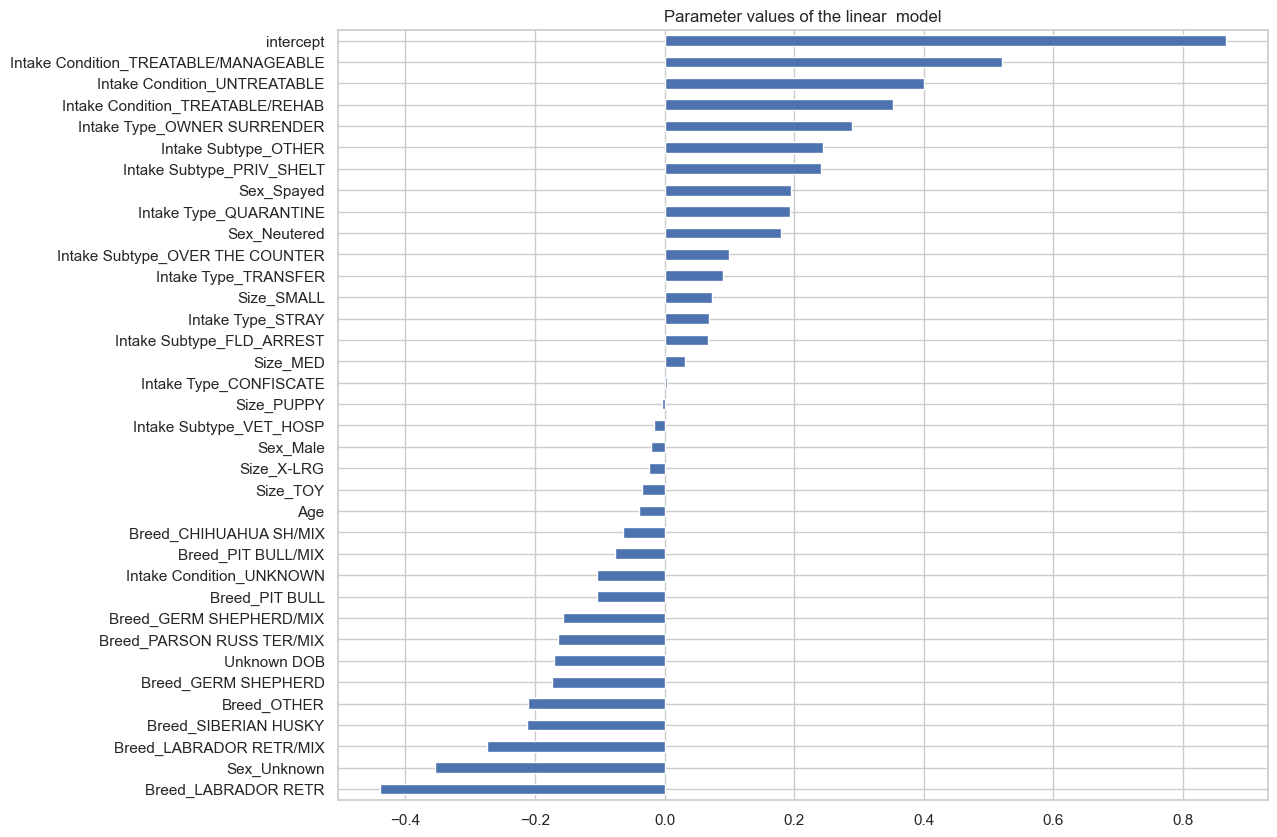

In [89]:
#@ 12  Create a Pandas series containing the coefficients of the linear model,
# and then plot the series with a horizontal bar plot.
# The index of the series should start with 'intercept', then contain the
# predictor variable names.
#
# Hint: You can do this by first making a series containing only the intercept value,
# then creating another series with the other coefficients, and then concatenating
# the two series using pd.concat().

# YOUR CODE HERE
int = pd.Series([regr.intercept_], index=['intercept'])
coef = pd.Series(regr.coef_, index=copy.columns)
coef_series = pd.concat([int, coef]).sort_values(ascending=True)
coef_series.plot(kind='barh', figsize=(12, 10))
plt.xlabel('')
plt.title('Parameter values of the linear  model')
plt.show()

# Some of the coefficients are positive, and some are negative.  One of the larger negative coefficients is the labrador receiver breed.  

What is the significance of this coefficient being negative?

Make predictions on the test data.

In [92]:
#@ 13  Use the model to make predictions from the test data.
# Assign the predictions to variable 'y_pred'.

# YOUR CODE HERE
y_pred = regr.predict(X_test)

Compute the mean squared error and the mean absolute error.

In [94]:
mse = ((y_pred - y_test)**2).mean()
mae = np.abs(y_pred - y_test).mean()

In [95]:
print(f'test MSE: {mse:.3g}, test MAE: {mae:.3g}')

test MSE: 0.29, test MAE: 0.443


How well did we do?  Compute the baseline prediction, then compute the test MSE and test MAE using the baseine.

Ask yourself if we want the baseline values to be above or below the test values above.

In [97]:
#@ 14  Compute the baseline MSE and MAE.
# First, compute the baseline prediction (sometimes called the "blind prediction").
# Then compute test MSE and test MAE using the baseline prediction.
# Assign your results to 'baseline_mse' and 'baseline mae'.

# YOUR CODE HERE
baseline = y_train.mean()
baseline_error = baseline - y_test

baseline_mse = (baseline_error ** 2).mean()

baseline_mae = np.abs(baseline_error).mean()


In [98]:
print(f'baseline MSE: {baseline_mse:.3g}, baseline MAE: {baseline_mae:.3g}')

baseline MSE: 0.379, baseline MAE: 0.538


Now let's compare the predictions on the test data and the true values.

Create a predicted/actuals plot using the test data and predictions from the test data.

Text(0.5, 0, 'actual')

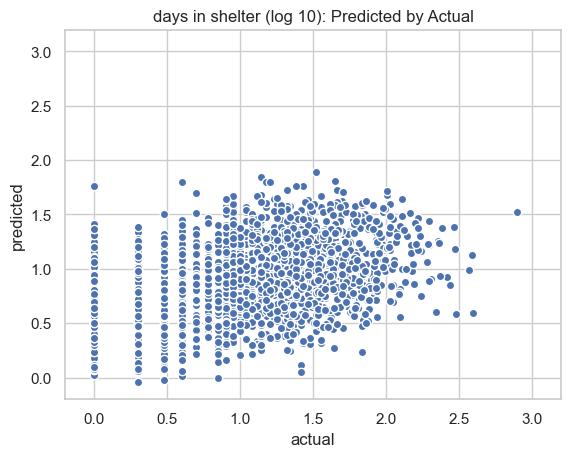

In [100]:
#@ 15  Produce a predicted/actuals plot, which is a scatterplot showing
# actual values on the x axis and predicted values on the y axis.
# Use 0,3 as the limits on both the x and y axes.
# Make sure to give the plot a title and axis labels.
#
# Hint: code for a predicted/actuals plot was share in a class lecture.

# YOUR CODE HERE

plt.scatter(y_test, y_pred, edgecolor='white')
plt.xlim(-0.2, 3.2)
plt.ylim(-0.2, 3.2)
plt.title('days in shelter (log 10): Predicted by Actual')
plt.ylabel('predicted')
plt.xlabel('actual')

In [101]:
#@ 16  In your own words, Describe the kind of errors that the model is making on the test data.
# Enter your text in the markdown cell below

# My answer:
# When the actual value is larger than about 1, the error tends to be negative.
# When the actual value is less than about 1, the error tends to be positive.
# The predicted value on the test set is never greater than 2.

#

There are a couple notable columns of points where there are errors.  These errors tend to happen when the actual value is 0, around 0.3, 0.5, 0.6, and 0.7.  For these datapoints we dont see a clump of predictions but more of a straight column.  This means that for these values we get a whole range of predictions and not a good clumping around what the actual value is.  when the actual value starts getting closer to and surpases one we get a better clumping of predictions around the line.